In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import sqlalchemy as sqla
df = pd.read_pickle("./dummy.pkl")

In [4]:
df

,ID_User,Beitrag
0,28526,Das ist eine Schicht von mehreren 1000 möglich...
1,28526,wird das dann wie bei den arbeitszeugnissen we...
2,28526,naja ein bisserl mehr als 10-20 prozent der be...
3,28526,Wobei ich das Beispiel der Mindestsicherung oh...
4,28526,"Also wenn es einen Narrativ in Hollywood gibt,..."
...,...,...
795,18006,"Europa zu einem ""melting pot"" zu machen mit Ku..."
796,18006,Jeder männliche Afghane ist verpflichtet einen...
797,18006,Man muss die Flüchtlinge nur bis an die türkis...
798,18006,"Nein, die islamistische Terrorgruppe ""Islamisc..."


In [43]:
IDS = df.drop_duplicates(subset = ["ID_User"])['ID_User'].tolist()

In [36]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [37]:
train_df = train_df.reindex(columns=['Beitrag','ID_User'])
train_df.columns = ["text", "labels"]
train_df = train_df.reset_index(drop=True)
train_df

,text,labels
0,Das hat aber wenig mit Fluchtbewegungen zu tun...,22876
1,"Natürlich gibt es Drogendealer, und gerade in ...",18446
2,Sparpaket Sicherheit... welche Regierung war d...,8765
3,Die Grundwehrdiener seien speziell für den Ein...,8765
4,ihr seid nach wie vor Irre weil wenn man da...,11656
...,...,...
635,"das ""G'schichtl"" ist schon richtig:es kommt ni...",6498
636,Ist eigentlich schon weit verbreiteter Standar...,6247
637,"Den zentralen politischen Figuren, so unerträg...",22876
638,"Wo gibts ein ""Leben und leben lassen""?In deine...",30661


In [38]:
eval_df = eval_df.reindex(columns=['Beitrag','ID_User'])
eval_df.columns=["text","labels"]
eval_df = eval_df.reset_index(drop=True)
eval_df

,text,labels
0,"Wirklich erschütternd ist, wenn man sichfolgen...",26532
1,na echt jetzt - ürigens ist hertha ein traditi...,8446
2,Männer und Frauen haben - biologisch bedingt -...,6498
3,Ganz raushalten kannst es nicht. Und es ist au...,5854
4,Sie sollten auch andere Änderungen mit einbezi...,6498
...,...,...
155,aus dem von Sowjets besetzten EstlandZuerst wu...,30344
156,"Nein, die islamistische Terrorgruppe ""Islamisc...",18006
157,"Ich finde, es hat nichts mit irgendeiner Hetze...",12887
158,Ungefähr als ob man Heini Staudinger (den ich ...,15886


In [33]:
import torch
cuda_available = torch.cuda.is_available()
print("Cuda available : ",cuda_available)

Cuda available :  True


In [44]:
import logging

import pandas as pd
import sklearn

from simpletransformers.classification import (
    ClassificationArgs,
    ClassificationModel,
)
from sklearn.metrics import accuracy_score

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 3
model_args.no_save = True
model_args.evaluate_during_training = True
model_args.labels_list = IDS

model = ClassificationModel(
    "bert", 
    "bert-base-german-cased", 
    args=model_args, 
    num_labels=len(UserIDListe), 
    use_cuda=cuda_available,
)

Some weights of the model checkpoint at bert-base-german-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoi

In [48]:
model.train_model(train_df, eval_df=eval_df, acc=accuracy_score)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/640 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_20_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/80 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_20_2


Running Epoch 1 of 3:   0%|          | 0/80 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_20_2


Running Epoch 2 of 3:   0%|          | 0/80 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_20_2
INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(240,
 defaultdict(list,
             {'global_step': [80, 160, 240],
              'train_loss': [0.3314361572265625,
               0.4568061828613281,
               0.09681510925292969],
              'mcc': [0.6908806621957383,
               0.7110368193286883,
               0.730429419605532],
              'acc': [0.70625, 0.725, 0.74375],
              'eval_loss': [1.1547414779663085,
               1.028223419189453,
               0.9943588256835938]}))

In [52]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_20_2


Running Evaluation:   0%|          | 0/20 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.730429419605532, 'acc': 0.74375, 'eval_loss': 0.9943588256835938}


In [63]:
predictions, raw_outputs = model.predict(list(eval_df['text']))

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [69]:
score_bert = accuracy_score(predictions, eval_df['labels'])

In [70]:
score_bert

0.74375

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(eval_df['labels'], predictions)

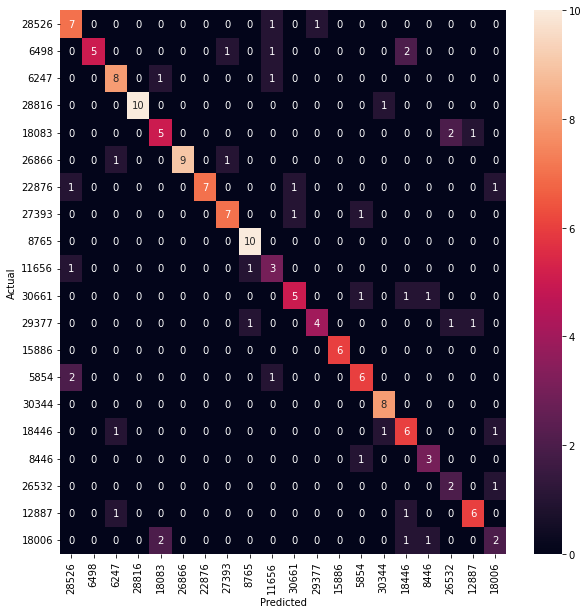

In [73]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt='d', xticklabels=UserIDListe, yticklabels=UserIDListe)
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()